In [1]:
## Preprocessing of freesurfer resutls
## Merging all PD/ET/NC freesurfer outputs into one table. /output/all_freesurfer_out.csv
#  reading subject list
from pathlib import Path
import pandas as pd
import seaborn as sns
sub_list_file = Path('/output/subjects.list')
sub_list = pd.read_csv(sub_list_file, sep='\t', header=0, index_col=0)

#reading freesurfer results
out_dir = Path("/output")
res_file = out_dir/'freesurfer_out_preped.csv'
FS_DIR  = out_dir / 'freesurfer_output_20.2.0/'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
for i_group in range(n_groups):
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR/GROUPS[i_group]/'aseg_stats.txt';
    wm_file = FS_DIR/GROUPS[i_group]/'wmparc_stats.txt'; 
    lh_area_file      = FS_DIR/GROUPS[i_group]/'lh.a2009s.area.txt';      rh_area_file      = FS_DIR/GROUPS[i_group]/'rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR/GROUPS[i_group]/'lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR/GROUPS[i_group]/'rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR/GROUPS[i_group]/'lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR/GROUPS[i_group]/'rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR/GROUPS[i_group]/'lh.a2009s.volume.txt';    rh_volume_file    = FS_DIR/GROUPS[i_group]/'rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...


In [2]:
# QA checking: nan errors (eTIV)
import numpy as np
#[print(x, all_data.loc[x,'eTIV']) for x in all_data.index if np.isnan(all_data.loc[x,'eTIV'])]
all_data[all_data.isna().any(axis=1)]

,age,sex,diagnosis,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,...,rh_S_parieto_occipital_volume,rh_S_pericallosal_volume,rh_S_postcentral_volume,rh_S_precentral-inf-part_volume,rh_S_precentral-sup-part_volume,rh_S_suborbital_volume,rh_S_subparietal_volume,rh_S_temporal_inf_volume,rh_S_temporal_sup_volume,rh_S_temporal_transverse_volume
id,,,,,,,,,,,,,,,,,,,,,


In [3]:
all_data.index   = [x.replace('-','_') for x in all_data.index]
all_data.columns = [x.replace('-','_') for x in all_data.columns]
all_data.columns

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'rh_S_parieto_occipital_volume', 'rh_S_pericallosal_volume',
       'rh_S_postcentral_volume', 'rh_S_precentral_inf_part_volume',
       'rh_S_precentral_sup_part_volume', 'rh_S_suborbital_volume',
       'rh_S_subparietal_volume', 'rh_S_temporal_inf_volume',
       'rh_S_temporal_sup_volume', 'rh_S_temporal_transverse_volume'],
      dtype='object', length=735)

In [4]:
# generate the indicator variables for diagnosis and sex
import pandas as pd
import seaborn as sns
#reading freesurfer results
def eqStr(x, str_y):
    if x == str_y:
        return 1
    else:
        return 0
tab_data = all_data.copy();
tab_data["is_PD"]     = [eqStr(x, "PD") for x in tab_data["diagnosis"]];
tab_data["is_ET"]     = [eqStr(x, "ET") for x in tab_data["diagnosis"]];
tab_data["is_NC"]     = [eqStr(x, "NC") for x in tab_data["diagnosis"]];
tab_data["is_Male"]   = [eqStr(x, "M") for x in tab_data["sex"]];
tab_data["is_Female"] = [eqStr(x, "F") for x in tab_data["sex"]];
tab_data=tab_data.rename(index=dict(zip(tab_data.index, [x.replace('-','_') for x in tab_data.index])),
                         columns=dict(zip(tab_data.columns, [x.replace('-','_') for x in tab_data.columns])),)
print(tab_data.columns)

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'rh_S_suborbital_volume', 'rh_S_subparietal_volume',
       'rh_S_temporal_inf_volume', 'rh_S_temporal_sup_volume',
       'rh_S_temporal_transverse_volume', 'is_PD', 'is_ET', 'is_NC', 'is_Male',
       'is_Female'],
      dtype='object', length=740)


PD 43
ET 38
NC 34


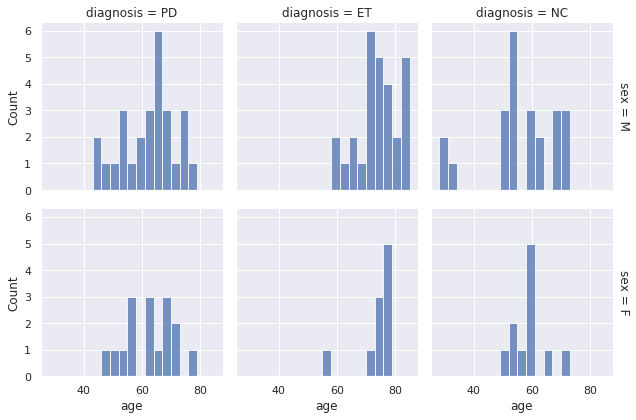

In [5]:
# plot sex and diagnosis distribution 2*3
for x in GROUPS:
    print(x , len(tab_data[tab_data["diagnosis"]==x]))
sns.set_theme(style="darkgrid")
sns.displot(
    tab_data, x="age", col="diagnosis", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [6]:
tab_data.to_csv(res_file)